## Advanced Regression - House Price Prediction - EPGP ML & AI C37

This notebook has been prepared by <b>Poolakit Bharadwaj</b> for the final submission towards the House Price Prediction assignment

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

## Business Goal

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#Load the necessary libraries for data manipulation

import pandas as pd
import numpy as np

#Libraries for data visualisation

import seaborn as sns
import plotly.express as px
import plotly.io as pio; pio.renderers.default='notebook'
import matplotlib.pyplot as plt
%matplotlib inline

#Library to calculate correlations
!pip install dython


#Ignore warnings

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset and storing in a DataFrame for data manipulation

df = pd.read_csv('train (1).csv')

#Looking at the DataFrame to understand the structure

pd.options.display.max_columns = None #enable to see all the DataFrame columns

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
#Understanding more about the fields and data types

df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## Creating Dataframe copy

In [5]:
#Creating a separate copy of the DataFrame for data manipulation

df_def = df.copy(deep=True) #deep=True won't reflect the changes done to 'df_def' on the original dataframe 'df'

#Looking at the new dataframe

df_def.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Missing value treatment

In [6]:
#Options to display all rows in the cell output

pd.options.display.max_rows = None

#Calculating the percentage of missing values for each field in the DataFrame

df_def.isnull().sum() * 100 / len(df_def)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [7]:
df_def.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [8]:
df_def.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

#### As per the CSV file, the 'NA' values in the PoolQC variable denote absence of a pool in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [9]:
df_def["PoolQC"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#Looking at the MiscFeature next, contains 96% missing values

df_def.MiscFeature.isna().sum()

1406

#### As per the CSV file, the 'NA' values in the MiscFeature variable denote no miscellaneous feature in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [11]:
df_def["MiscFeature"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
#Looking at Alley variable next, as it has 93% missing values

df_def.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

#### As per the CSV file, the 'NA' values in the Alley variable denote that there is no alley access to the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [13]:
df_def["Alley"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
#Looking at the Fence variable next as it has 80% missing values

df_def.Fence.isna().sum()

1179

#### As per the CSV file, the 'NA' values in the Fence variable denote that there is no fence in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [15]:
df_def["Fence"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
#Looking at the FireplaceQu variable as it has 47% missing values

df_def.FireplaceQu.isna().sum()

690

#### As per the CSV file, the 'NA' values in the FireplaceQu variable denote that there is no fireplace in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [17]:
df_def["FireplaceQu"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
#Looking at the BsmtQual variable, 2.5% missing values

df_def.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

#### As per the CSV file, the 'NA' values in the BsmtQual variable denote that there is no basement in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [19]:
df_def["BsmtQual"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
#Looking at the BsmtCond variable, 2.5% missing values

df_def.BsmtCond.isna().sum()

37

#### As per the CSV file, the 'NA' values in the BsmtCond variable denote that there is no basement in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [21]:
df_def["BsmtCond"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
df_def.BsmtExposure.isna().sum()

38

#### As per the CSV file, the 'NA' values in the BsmtExposure variable denote that there is no basement in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [23]:
df_def["BsmtExposure"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
#Looking at the BsmtFinType1 variable, 2.5% missing values

df_def.BsmtFinType1.isna().sum()

37

#### As per the CSV file, the 'NA' values in the BsmtFinType1 variable denote that there is no basement of Type1 in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [25]:
df_def["BsmtFinType1"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
#Looking at the BsmtFinType2 variable, 2.6% missing values

df_def.BsmtFinType2.isna().sum()

38

#### As per the CSV file, the 'NA' values in the BsmtFinType2 variable denote that there is no basement of Type2 in the property. Basement of Type1 could still be present. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [27]:
df_def["BsmtFinType2"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
#Looking at GarageType as it has 5.5% missing values

df_def.GarageType.isna().sum()

81

#### As per the CSV file, the 'NA' values in the GarageType variable denote that there is no garage in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [29]:
df_def["GarageType"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
#Looking at GarageFinish as it has 5.5% missing values

df_def.GarageFinish.isna().sum()

81

#### As per the CSV file, the 'NA' values in the GarageFinish variable denote that there is no garage in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [31]:
df_def["GarageFinish"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [32]:
#Looking at GarageQual as it has 5.5% missing values

df_def.GarageQual.isna().sum()

81

#### As per the CSV file, the 'NA' values in the GarageQual variable denote that there is no garage in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [33]:
df_def["GarageQual"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [34]:
#Looking at GarageCond as it has 5.5% missing values

df_def.GarageCond.isna().sum()

81

#### As per the CSV file, the 'NA' values in the GarageCond variable denote that there is no garage in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [35]:
df_def["GarageCond"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
#Looking at Electrical variable, it has 1 missing value

df_def.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### We can impute the missing value of Electrical variable with the value 'SBrkr' as it is the most frequently occurring value among similar properties (similar Bldgtype, HouseStyle, YearBuilt, RoofStyle, Foundation, Heating etc.)

In [37]:
df_def["Electrical"].fillna("SBrkr", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [38]:
df_def.GarageYrBlt.isna().sum()

81

#### As per the CSV file, the 'NA' values in the GarageYrBlt variable denote that there is no garage in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'NA'

In [39]:
df_def["GarageYrBlt"].fillna("NA", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [40]:
#Looking at MasVnrType next

df_def.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [41]:
df_def.MasVnrType.isna().sum()

8

#### Imputing the missing value of MasVnrType variable with the value 'None' as it is the most frequently occurring value among similar properties (similar Bldgtype, HouseStyle, RoofStyle, Foundation, Heating etc.)

In [42]:
df_def["MasVnrType"].fillna("None", inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
#Looking at MasVnrArea next

df_def.MasVnrArea.isna().sum()

8

#### Imputing the missing value of MasVnrArea variable with 0 as we have replaced the corresponding MasVnrType values with 'None' and most of the other 'None' values have MasVnrArea = 0

In [44]:
df_def["MasVnrArea"].fillna(0, inplace = True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [45]:
#Looking at LotFrontage as it has 17% missing values

df_def.LotFrontage.isna().sum()

259

In [46]:
df_def.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [47]:
df_def.LotFrontage.notnull().sum()

1201

In [48]:
#Replacing the NA values of LotFrontage with the median non-NA values

df_def["LotFrontage"].fillna(np.median(df_def[df_def.LotFrontage.notnull()].LotFrontage, axis=0), inplace = True)

<AxesSubplot:>

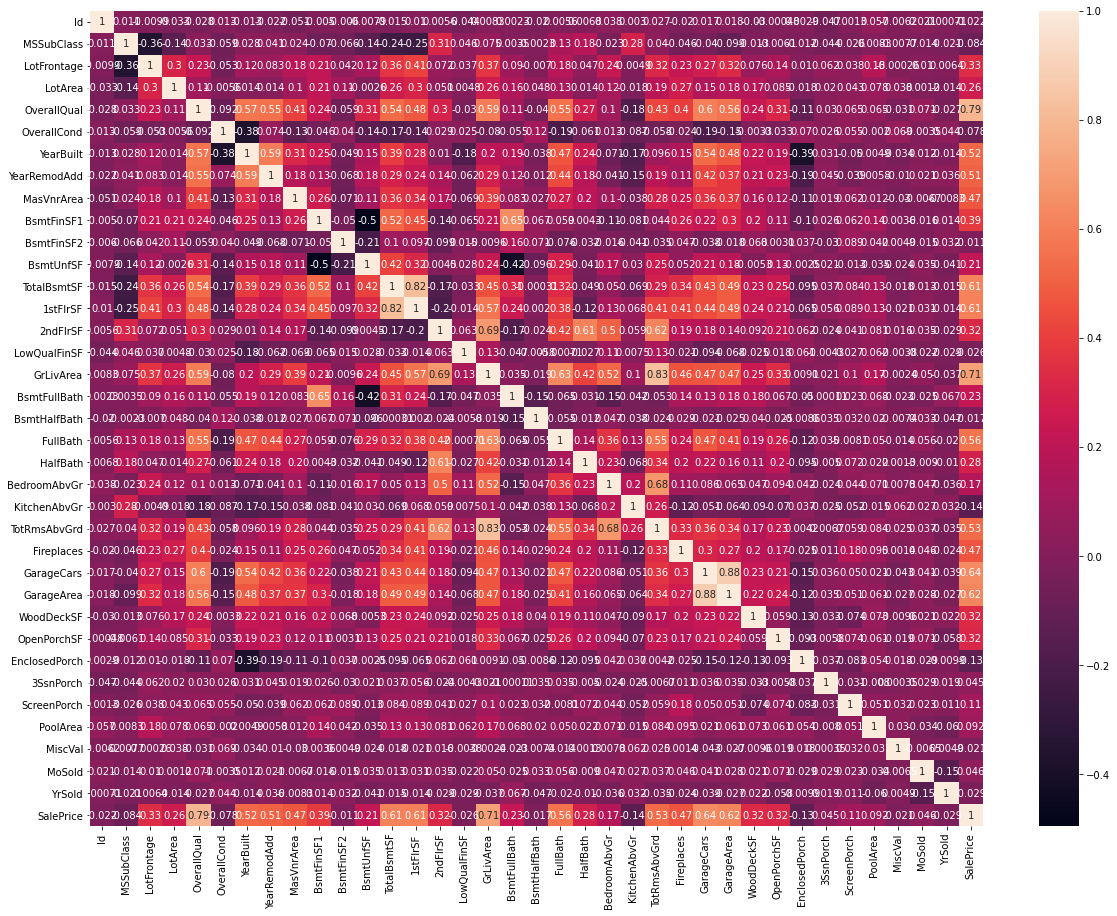

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(df_def.corr(), annot=True)

## Dropping unnecessary variables

In [50]:
#Dropping Id variable as it's just a row number

df_def.drop('Id', axis=1,inplace=True)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Univariate analysis, bivariate and outlier treatment

In [51]:
#Univariate analysis for LotFrontage variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='LotFrontage', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [52]:
df_def[df_def.LotFrontage > 107].LotFrontage.count()/len(df_def.LotFrontage)*100

#4% of values are more than the upper fence, we will replace them with the upper fence value, i.e. 107
#3 values are less than the lower fence, we will replace them with lower fence value, i.e. 32

3.9726027397260277

In [53]:
df_def[df_def.LotFrontage > 107] = 107

df_def[df_def.LotFrontage < 32] = 32

In [54]:
#Univariate analysis for LotFrontage variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='LotArea', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [55]:
df_def[df_def.LotArea < 107].LotArea.count()/len(df_def.LotArea)*100

3.287671232876712

In [56]:
df_def[df_def.LotArea > 17217].LotArea.count()/len(df_def.LotArea)*100

3.904109589041096

In [57]:
plt.figure(figsize=(10,12))

px.scatter(df_def, x="LotArea", y="SalePrice")

#Low correlation between LotArea and SalePrice

<Figure size 720x864 with 0 Axes>

In [58]:
# Replacing the values beyond upper fence with upper fence value - 17217

df_def[df_def.LotArea > 17217] = 17217

# Replacing the values below 5th percentile with 5th percentile value - 107

df_def[df_def.LotArea < 107] = 107

In [59]:
df_def.LotArea.describe()

count     1460.000000
mean      8990.512329
std       3966.828084
min        107.000000
25%       7200.000000
50%       9153.000000
75%      11236.500000
max      17217.000000
Name: LotArea, dtype: float64

In [60]:
#Univariate analysis for MasVnrArea variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='MasVnrArea', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [61]:
df_def[df_def.MasVnrArea > 706.2999999999988].MasVnrArea.count()/len(df_def.MasVnrArea)*100

5.0

In [62]:
df_def.MasVnrArea.describe()

count     1460.000000
mean       766.202740
std       3320.892439
min          0.000000
25%          0.000000
50%          0.000000
75%        168.000000
max      17217.000000
Name: MasVnrArea, dtype: float64

In [63]:
np.percentile(df_def.MasVnrArea, 95)

706.2999999999988

In [64]:
plt.figure(figsize=(10,12))

px.scatter(df_def, x="MasVnrArea", y="SalePrice")

#Low correlation between MasVnrArea and SalePrice

<Figure size 720x864 with 0 Axes>

In [65]:
# Replacing the values beyond 95%ile with 95%ile value - 706

df_def[df_def.MasVnrArea > 706.2999999999988] = 706


In [66]:
#Univariate analysis for BsmtFinSF1 variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='BsmtFinSF1', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [67]:
# Replacing the values beyond 95%ile with 95%ile value - 1696

df_def[df_def.BsmtFinSF1 > 1696] = 1696


In [68]:
#Univariate analysis for BsmtFinSF2 variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='BsmtFinSF2', width=600)

<Figure size 720x864 with 0 Axes>

In [142]:
plt.figure(figsize=(10,12))

px.scatter(df_def, x="BsmtFinSF2", y="SalePrice")

#Low correlation

<Figure size 720x864 with 0 Axes>

In [70]:
# Replacing the values beyond 98%ile with 98%ile value - 706

df_def[df_def.BsmtFinSF2 > 706] = 706

In [71]:
#Univariate analysis for BsmtUnfSF variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='BsmtUnfSF', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [72]:
plt.figure(figsize=(10,12))

px.scatter(df_def, x="BsmtUnfSF", y="SalePrice")

#Low correlation

<Figure size 720x864 with 0 Axes>

In [73]:
# Replacing the values beyond upper fence with upper fence value - 1603

df_def[df_def.BsmtUnfSF > 1603] = 1603

In [74]:
#Univariate analysis for TotalBsmtSF variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='TotalBsmtSF', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [75]:
plt.figure(figsize=(10,12))

px.scatter(df_def, x="TotalBsmtSF", y="SalePrice")

<Figure size 720x864 with 0 Axes>

In [76]:
# Replacing the values beyond upper fence with upper fence value - 1932

df_def[df_def.TotalBsmtSF > 1932] = 1932

In [77]:
#Univariate analysis for 1stFlrSF variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='1stFlrSF', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [78]:
plt.figure(figsize=(10,12))

px.scatter(df_def, x="1stFlrSF", y="SalePrice")

<Figure size 720x864 with 0 Axes>

In [79]:
# Replacing the values beyond upper fence with upper fence value - 2028

df_def[df_def['1stFlrSF'] > 2028] = 2028

In [82]:
#Univariate analysis for 2ndFlrSF variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='2ndFlrSF', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [84]:
plt.figure(figsize=(10,12))

px.scatter(df_def, x="2ndFlrSF", y="SalePrice")

<Figure size 720x864 with 0 Axes>

In [86]:
# Replacing the values beyond upper fence with upper fence value - 1611

df_def[df_def['2ndFlrSF'] > 1611] = 1611

In [88]:
#Univariate analysis for LowQualFinSF variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='LowQualFinSF', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [95]:
plt.figure(figsize=(10,12))

px.scatter(df_def, x="LowQualFinSF", y="SalePrice")
#low correlation

<Figure size 720x864 with 0 Axes>

In [97]:
# Replacing the values beyond 96%ile with 96%ile values - 706

df_def[df_def['LowQualFinSF'] > 706] = 706

In [99]:
#Univariate analysis for GrLivArea variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='GrLivArea', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [100]:
# Replacing the upper outlier values with upper fence value - 2792

df_def[df_def['GrLivArea'] > 2792] = 2792

In [102]:
#Univariate analysis for GarageArea variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='GarageArea', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [105]:
# Replacing the upper outlier values with upper fence value - 1053

df_def[df_def['GrLivArea'] > 1053] = 1053

In [107]:
#Univariate analysis for WoodDeckSF variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='WoodDeckSF', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [109]:
# Replacing the upper outlier values with 95%ile value

df_def[df_def['WoodDeckSF'] > 1053] = 1053

In [112]:
#Univariate analysis for OpenPorchSF variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='OpenPorchSF', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [118]:
# Replacing the upper outlier values with 95%ile value

df_def[df_def['OpenPorchSF'] > 1053] = 1053


In [120]:
#Univariate analysis for EnclosedPorch variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='EnclosedPorch', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [121]:
# Replacing the upper outlier values with 95%ile value

df_def[df_def['EnclosedPorch'] > np.percentile(df_def['EnclosedPorch'], 95)] = np.percentile(df_def['EnclosedPorch'], 95)


In [125]:
#Univariate analysis for 3SsnPorch variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='3SsnPorch', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [127]:
#Univariate analysis for ScreenPorch variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='ScreenPorch', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [129]:
#Univariate analysis for MiscVal variable

plt.figure(figsize=(10,12))

px.violin(df_def, y='MiscVal', width=600)


<Figure size 720x864 with 0 Axes>

In [140]:
# Replacing the upper outlier values with 95%ile value

df_def[df_def['MiscVal'] > np.percentile(df_def['MiscVal'], 98)] = np.percentile(df_def['MiscVal'], 98)


### Encoding for categorical variables

In [ ]:
#Label encoding for ordinal variables

df_def['LandContour'] = df_def['LandContour'].map({'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0})
df_def['LotShape'] = df_def['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df_def['ExterQual'] = df_def['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_def['BsmtQual'] = df_def['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_def['BsmtExposure'] = df_def['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df_def['BsmtFinType1'] = df_def['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})

df_def['HeatingQC'] = df_def['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_def['KitchenQual'] = df_def['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_def['FireplaceQu'] = df_def['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_def['GarageFinish'] = df_def['FireplaceQu'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0})
df_def['BldgType'] = df_def['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0})

df_def['HouseStyle'] = df_def['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Unf': 6, '2.5Fin': 5, '2Story': 4, 
                                                 '1.5Unf': 3, '1.5Fin': 2, '1Story': 1, 'None': 0})
df_def['LotConfig'] = df_def['LotConfig'].map()